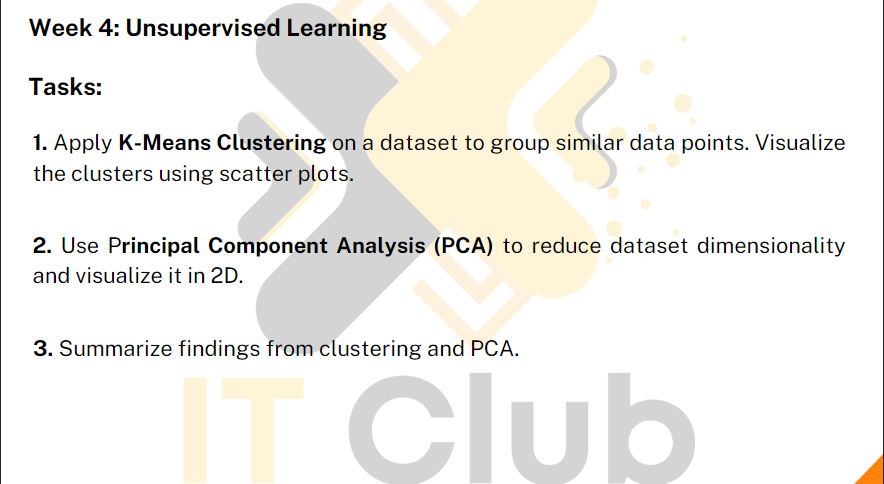

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris  #   the iris dataset can be imported like this too instead of using it locally.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


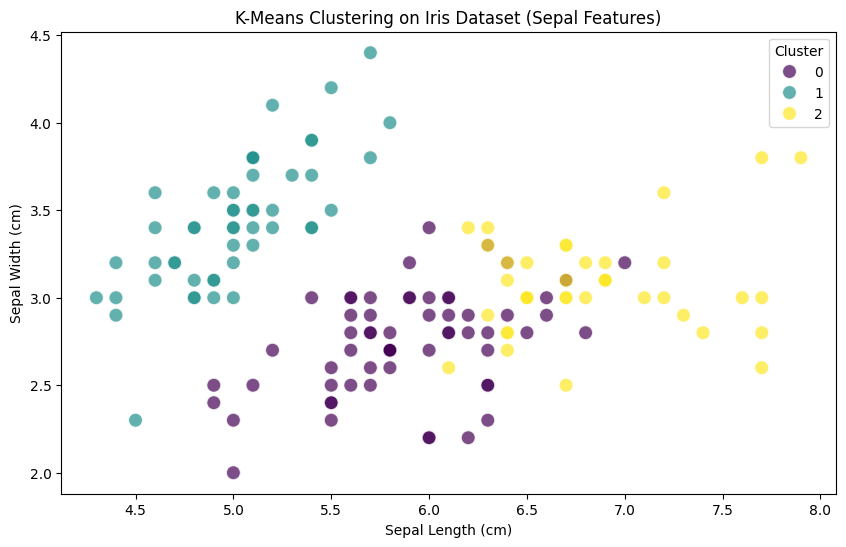

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_iris['cluster'] = kmeans.fit_predict(df_iris)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_iris["sepal length (cm)"], 
    y=df_iris["sepal width (cm)"], 
    hue=df_iris["cluster"], 
    palette="viridis", 
    s=100, 
    alpha=0.7
)
plt.title("K-Means Clustering on Iris Dataset (Sepal Features)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Cluster")
plt.show()


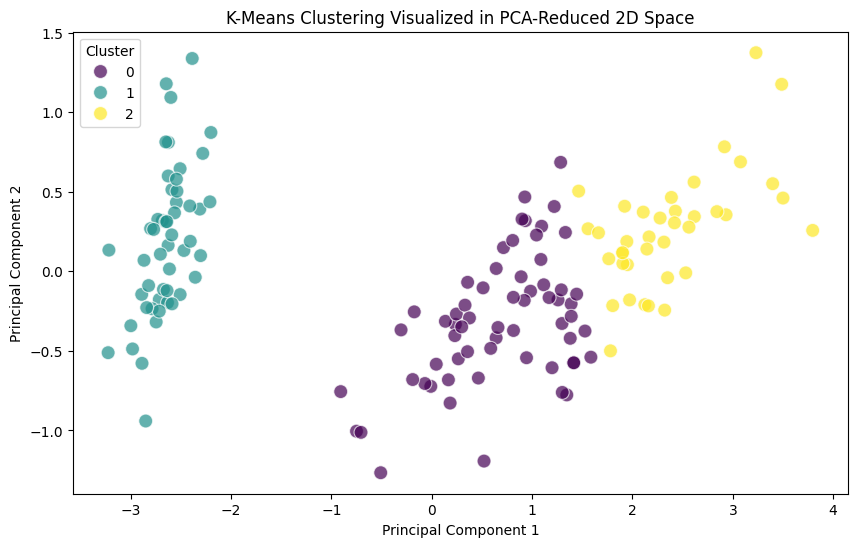

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_iris.drop(columns=['cluster']))

df_iris['PCA1'] = pca_result[:, 0]
df_iris['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_iris["PCA1"], 
    y=df_iris["PCA2"], 
    hue=df_iris["cluster"], 
    palette="viridis", 
    s=100, 
    alpha=0.7
)
plt.title("K-Means Clustering Visualized in PCA-Reduced 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


---
## Step 1: K-Means Clustering
We applied **K-Means Clustering** with **3 clusters**, assuming that the data naturally divides into three categories. A scatter plot of **sepal length vs. sepal width** was generated to visualize these clusters.

### Key Findings from K-Means Clustering:
- The algorithm successfully formed **three clusters** based on the feature similarities.
- Some **overlapping clusters** suggest that certain features (sepal length and width) alone **may not fully differentiate** the groups.
- To improve clarity, we needed to incorporate **more meaningful features**, leading to the use of PCA.

## Step 2: Dimensionality Reduction with PCA
Since the dataset had **four features**, it was difficult to visualize in 2D. **PCA** helped us reduce it to **two principal components**, retaining most of the variance.

### Key Findings from PCA:
- PCA transformed the dataset into a **2D representation**, making the clusters more distinct.
- The scatter plot in PCA-reduced space **showed clearer separation** between clusters.
- While K-Means formed clusters, PCA demonstrated that some **species might have inherent similarities**, which explains the overlap.